As an individual with aspirations to transition to the data science field,my aim was to gain deeper insights into diverse roles, skill prerequisites, job opportunities, and compensation aspects. What better approach to enhance my understanding than analyzing a dataset? 

In this project, I've undertaken data cleaning and exploratory data analysis using the Data Science Job Postings dataset from Kaggle

In [1]:
import pandas as pd
df=pd.read_csv('Uncleaned_DS_jobs.csv')

In [2]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [6]:
#Checking for null values and removing unnnecessary columns

df.isna().sum()
#df = df.drop('Competitors',axis=1)

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64

Removing unnecessary characters from Salary estimate so we can find the min,max and avg salary for that position

In [7]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('[^0-9-]','',regex=True)
df['Salary Estimate']

0      137-171
1      137-171
2      137-171
3      137-171
4      137-171
        ...   
667    105-167
668    105-167
669    105-167
670    105-167
671    105-167
Name: Salary Estimate, Length: 672, dtype: object

In [8]:
# Finding minimum and maximum salary from the salry range

df[['min_salary','max_salary']] = df['Salary Estimate'].str.split('-',expand=True)

In [9]:
# Converting datatype - from str to int

df['min_salary']=df['min_salary'].apply(lambda X : int(X))
df['max_salary']=df['max_salary'].apply(lambda X : int(X))


In [362]:
df[df['min_salary']==79]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary
62,62,Data Scientist,79-131,Introduction\n\nHave you always wanted to run ...,3.5,iRobot\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),79,131
63,63,Data Scientist,79-131,About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,79,131
64,64,Global Data Analyst,79-131,Global Data Analyst\nJob Code\n\n3938\n\nLocat...,3.8,Dermalogica\n3.8,"Carson, CA","Carson, CA",201 to 500 employees,1986,Subsidiary or Business Segment,Consumer Products Manufacturing,Manufacturing,$100 to $500 million (USD),79,131
65,65,Data Engineer,79-131,POSITION SUMMARY\n\n\nThe candidate will be jo...,3.7,Bayview Asset Management\n3.7,"Coral Gables, FL","Coral Gables, FL",1001 to 5000 employees,1995,Company - Private,Investment Banking & Asset Management,Finance,$100 to $500 million (USD),79,131
66,66,Data Scientist,79-131,"As a Data Scientist, you'll utilize advanced q...",3.7,Via Transportation\n3.7,"New York, NY","New York, NY",501 to 1000 employees,2012,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,79,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,441,Data Scientist,79-133,Job Description\nWe are looking for a Data Sci...,5.0,Maxiom\n5.0,"Ashburn, VA","Ashburn, VA",1 to 50 employees,-1,Company - Public,-1,-1,Unknown / Non-Applicable,79,133
442,442,Data Scientist,79-133,Job Description\n\nTransforming the future of ...,2.7,Change Healthcare\n2.7,"Lombard, IL","Nashville, TN",10000+ employees,2007,Company - Public,IT Services,Information Technology,Unknown / Non-Applicable,79,133
443,443,Data Scientist,79-133,"Job Description\nInfoscitex, a DCS company, is...",4.1,DCS Corp\n4.1,"Hampton, VA","Alexandria, VA",1001 to 5000 employees,1977,Company - Private,Research & Development,Business Services,$100 to $500 million (USD),79,133
444,444,Data Scientist,79-133,About Hive\n\nHive is a full-stack deep learni...,2.1,Hive (CA)\n2.1,"San Francisco, CA","Los Angeles, CA",Unknown,2019,Company - Private,Telecommunications Services,Telecommunications,Unknown / Non-Applicable,79,133


In [10]:
# Finding average salary based on minimum and maximum salary

df['avg_salary'] = df[['min_salary','max_salary']].mean(axis=1)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154.0
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154.0
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154.0


In [11]:
#Cleaning up the column - Company Name

df['Company Name']=df['Company Name'].str.replace('[\n\d]','',regex=True)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154.0
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154.0
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154.0
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154.0
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154.0


In [12]:
#Splitting the location to reflect city and state seperately

df[['city','state']]=df['Location'].str.split(',',1,expand=True)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,city,state
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154.0,New York,NY
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154.0,Chantilly,VA
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154.0,Boston,MA
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154.0,Newton,MA
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154.0,New York,NY


Combing through the words in Job description to identify most required skills'

In [13]:
df['python']=df['Job Description'].apply(lambda X: 1 if 'python' in X.lower() else 0)
df['sql']=df['Job Description'].apply(lambda X: 1 if 'sql' in X.lower() else 0)
df['statistics']=df['Job Description'].apply(lambda X: 1 if 'statistics' in X.lower() else 0)
df['aws']=df['Job Description'].apply(lambda X: 1 if 'aws' in X.lower() else 0)
df['azure']=df['Job Description'].apply(lambda X: 1 if 'azure' in X.lower() else 0)
df['hadoop']=df['Job Description'].apply(lambda X: 1 if 'hadoop' in X.lower() else 0)
df['spark']=df['Job Description'].apply(lambda X: 1 if 'spark' in X.lower() else 0)
df['tableau']=df['Job Description'].apply(lambda X: 1 if 'tableau' in X.lower() else 0)
df['machine learning']=df['Job Description'].apply(lambda X: 1 if 'machine learning' in X.lower() else 0)


In [14]:
def modified_title(actual_title):
    modified_title=actual_title.lower()
    if 'data scientist' in modified_title:
        return 'data scientist'
    elif 'analyst' in modified_title:
        return 'data analyst'
    elif 'data engineer' in modified_title:
        return 'data engineer'
    elif 'machine learning' in modified_title:
        return 'mle'
    else:
        return 'na'
    

In [15]:
df['simplified_job_title']=df['Job Title'].apply(modified_title)


In [16]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,python,sql,statistics,aws,azure,hadoop,spark,tableau,machine learning,simplified_job_title
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,0,0,1,1,1,0,0,0,1,data scientist
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,0,1,1,0,0,1,0,0,1,data scientist
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,1,0,1,1,0,0,0,0,1,data scientist
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,1,1,0,1,0,0,0,0,1,data scientist
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,1,1,0,0,0,0,0,1,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT.,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,...,1,1,1,0,0,1,0,1,1,data scientist
668,668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,...,0,0,0,0,0,0,0,0,0,data scientist
669,669,Data Scientist,105-167,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,...,1,1,1,0,0,1,0,1,1,data scientist
670,670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated.,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,...,1,1,1,0,0,1,1,0,1,data scientist


In [23]:
#Identifying senior level vs junior level roles

def seniority(actual_title):
    level=actual_title.lower()
    emp = ['sr','senior','lead','principal','vp','vice president','director']
    for i in emp:
        if i in level:
            return 'senior'
        else:
            return 'na'

In [24]:
df['seniority']=df['Job Title'].apply(seniority)

In [25]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,sql,statistics,aws,azure,hadoop,spark,tableau,machine learning,simplified_job_title,seniority
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,0,1,1,1,0,0,0,1,data scientist,senior
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,1,1,0,0,1,0,0,1,data scientist,na
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,0,1,1,0,0,0,0,1,data scientist,na
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,1,0,1,0,0,0,0,1,data scientist,na
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,1,0,0,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT.,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,...,1,1,0,0,1,0,1,1,data scientist,na
668,668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,...,0,0,0,0,0,0,0,0,data scientist,na
669,669,Data Scientist,105-167,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,...,1,1,0,0,1,0,1,1,data scientist,na
670,670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated.,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,...,1,1,0,0,1,1,0,1,data scientist,na


In [26]:
df.drop('index',axis=1,inplace=True)
df.reset_index()
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,sql,statistics,aws,azure,hadoop,spark,tableau,machine learning,simplified_job_title,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst.,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,1,1,1,0,0,0,1,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech.,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,1,1,0,0,1,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group.,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,0,1,1,0,0,0,0,1,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON.,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,1,0,1,0,0,0,0,1,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions.,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,1,0,0,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT.,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,1,1,0,0,1,0,1,1,data scientist,na
668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,data scientist,na
669,Data Scientist,105-167,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,...,1,1,0,0,1,0,1,1,data scientist,na
670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated.,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,...,1,1,0,0,1,1,0,1,data scientist,na


Our dataset is now prepared and refined for analysis - exporting as seperate csv file

In [27]:
df.to_csv('Data_science Job',index=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             672 non-null    object 
 1   Salary Estimate       672 non-null    object 
 2   Job Description       672 non-null    object 
 3   Rating                672 non-null    float64
 4   Company Name          672 non-null    object 
 5   Location              672 non-null    object 
 6   Headquarters          672 non-null    object 
 7   Size                  672 non-null    object 
 8   Founded               672 non-null    int64  
 9   Type of ownership     672 non-null    object 
 10  Industry              672 non-null    object 
 11  Sector                672 non-null    object 
 12  Revenue               672 non-null    object 
 13  min_salary            672 non-null    int64  
 14  max_salary            672 non-null    int64  
 15  avg_salary            6

Identifying the states with highest number of job postings

In [29]:
state = df['state'].value_counts()
top_states = state[:10]
top_states

 CA    165
 VA     89
 MA     62
 NY     52
 MD     39
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
Name: state, dtype: int64

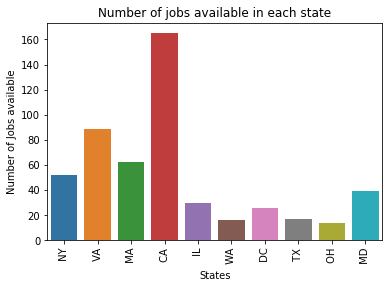

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x = 'state',
            data = df[df['state'].isin(top_states.index)])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of Jobs available')
plt.title('Number of jobs available in each state')
plt.show()


Creating a box plot to identify the minimum,maximum and average salary range

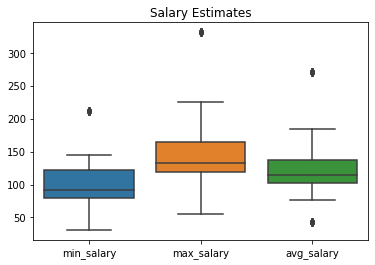

In [54]:
sns.boxplot(data = df[['min_salary','max_salary','avg_salary']])
plt.title('Salary Estimates')
plt.show()

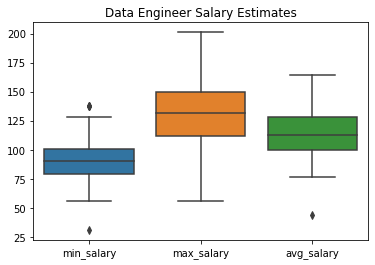

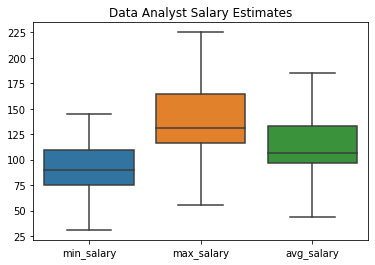

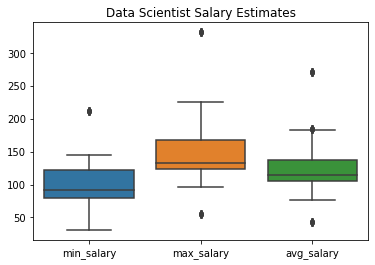

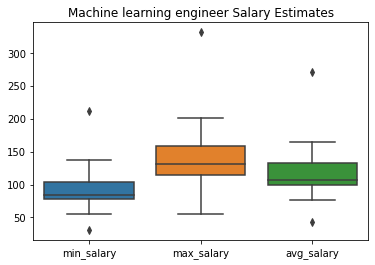

In [58]:
data_engineer_data = df[df['simplified_job_title'] == 'data engineer']
data_analyst_data = df[df['simplified_job_title'] == 'data analyst']
data_scientist_data = df[df['simplified_job_title'] == 'data scientist']
mle_data = df[df['simplified_job_title'] == 'mle']

# Create separate box plots for different data roles
sns.boxplot(data=data_engineer_data[['min_salary', 'max_salary', 'avg_salary']])
plt.title('Data Engineer Salary Estimates')
plt.show()

sns.boxplot(data=data_analyst_data[['min_salary', 'max_salary', 'avg_salary']])
plt.title('Data Analyst Salary Estimates')
plt.show()

sns.boxplot(data=data_scientist_data[['min_salary', 'max_salary', 'avg_salary']])
plt.title('Data Scientist Salary Estimates')
plt.show()

sns.boxplot(data=mle_data[['min_salary', 'max_salary', 'avg_salary']])
plt.title('Machine learning engineer Salary Estimates')
plt.show()

Identifying salary range by each state

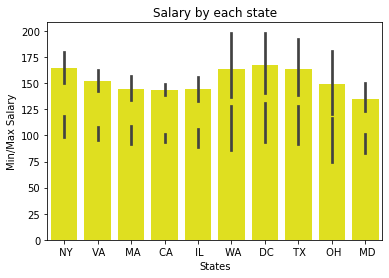

In [32]:
sns.barplot(x='state',y='min_salary',data=df[df['state'].isin(top_states.index)],color='blue')
sns.barplot(x='state',y='max_salary',data=df[df['state'].isin(top_states.index)],color='yellow')
plt.xlabel('States')
plt.ylabel('Min/Max Salary')
plt.title('Salary by each state')
plt.show()

Identifying the skillset required for each poistion

In [42]:
#Skillset for data scientists

data_science=df[df['simplified_job_title']=='data scientist']
melted_df = data_science.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

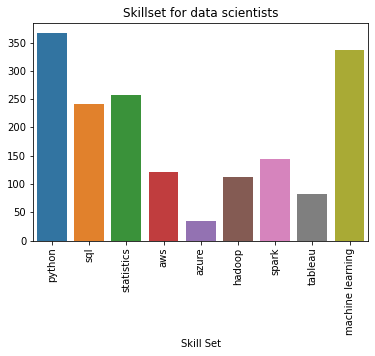

In [34]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for data scientists')
plt.xticks(rotation=90)
plt.show()

In [43]:
#Skillset for data analysts

data_analysis=df[df['simplified_job_title']=='data analyst']
melted_df = data_analysis.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

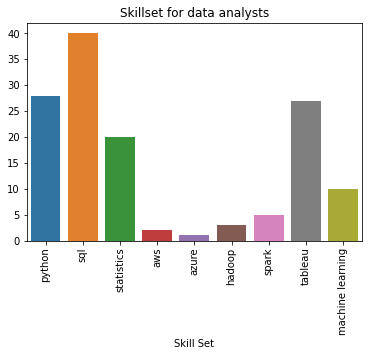

In [36]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for data analysts')
plt.xticks(rotation=90)
plt.show()

In [44]:
#Skillset for data engineers

data_engineer=df[df['simplified_job_title']=='data engineer']
melted_df = data_engineer.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

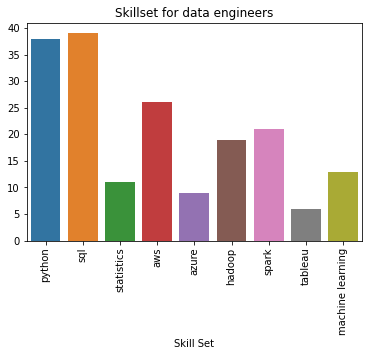

In [38]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for data engineers')
plt.xticks(rotation=90)
plt.show()

In [45]:
#Skillset for machine learning engineers

mle=df[df['simplified_job_title']=='mle']
melted_df = mle.melt(value_vars=['python','sql','statistics','aws','azure','hadoop','spark','tableau','machine learning'],
                              var_name='variable')
filtered_df = melted_df[melted_df['value'] == 1]

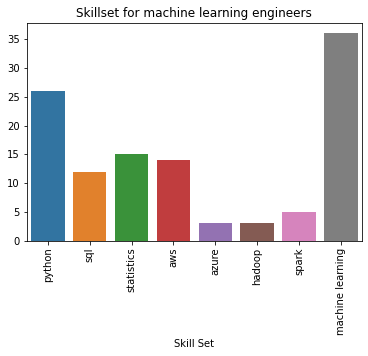

In [40]:
sns.countplot(x='variable',data=filtered_df)
plt.xlabel('Skill Set')
plt.ylabel('')
plt.title('Skillset for machine learning engineers')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Company ratings')

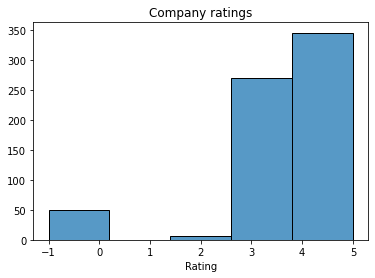

In [46]:
#Number of companies based on rating

sns.histplot(data=df['Rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('')
plt.title('Company ratings')

Conclusion:
    
California has the highest number of job postings compared to other states.


The average salary range is between $90K- $120K and the data engineering roles have a better salary range compared to other data roles.


Washington and Washington DC has a higher pay range compared to other states.


Moving on to must-have skillsets for each role,

For Data Scientists - Python,machine learning and statistics.

For Data Analysts - SQL and Tableau.

For Data Engineers - Python,SQL,AWS and spark

For Machine Learning Engineers - Machine learning,python and statistics.
